# 🧮 Computational Theory - 2025 Assessment
## 📁 `tasks.ipynb` - Computational Theory Notebook

**Module:** Computational Theory  
**Year:** 2025  
**Author:** *James Doonan*  
**Repository:** *https://github.com/JamesDoonan1/computational_theory*  
**Submission Deadline:** 🗓 **Sunday, 4 May 2025**  

---

## 📜 **Assessment Overview**
This Jupyter Notebook contains solutions to the **Computational Theory** assessment tasks. Each task is clearly labeled, documented, and implemented according to the **module requirements**.

### 📑 **Contents**
🔹 [Task 1: Binary Representations](#task-1-binary-representations)  
🔹 [Task 2: Hash Functions](#task-2-hash-functions)  
🔹 [Task 3: SHA256 Padding](#task-3-sha256-padding)  
🔹 [Task 4: Prime Numbers](#task-4-prime-numbers)  
🔹 [Task 5: Roots](#task-5-roots)  
🔹 [Task 6: Proof of Work](#task-6-proof-of-work)  
🔹 [Task 7: Turing Machine – Incrementing a Binary Number](#task-7-turing-machine--incrementing-a-binary-number)  
🔹 [Task 8: Computational Complexity](#task-8-computational-complexity)  
🔹 [Testing & Validation](#testing--validation)

---

## ⚡ **Instructions for this Notebook**
- Each **task** is implemented in a separate section.
- Code follows **PEP8 standards** for readability.
- Markdown cells provide **explanations, research, and insights**.

---


# Task 1: Binary Representations

## 🔹 Rotations, Choice, and Majority Functions

This task implements **bitwise operations** on **32-bit unsigned integers** commonly used in **cryptography**.  

For performance-optimised bitwise operations, see:  
[Efficient Bitwise Computations – Intel Developer Zone](https://software.intel.com/content/www/us/en/develop/articles/fast-bitwise-operations.html)  

Binary arithmetic is a core concept in computational theory, essential for understanding bitwise functions.  
For a deeper understanding, refer to:  
[Understanding Binary Arithmetic – MIT OpenCourseWare](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-042j-mathematics-for-computer-science-fall-2005/) 

### ✅ Functions Implemented:
1. **`rotl(x, n=1)`** – Rotate bits **left**.
2. **`rotr(x, n=1)`** – Rotate bits **right**.
3. **`ch(x, y, z)`** – Bitwise choice function.
4. **`maj(x, y, z)`** – Bitwise majority function.

### 🔹 Key Considerations:
- Operate within **32-bit unsigned integer space**.
- **Use bitwise operators** (`&`, `|`, `^`, `~`).
- Ensure results **wrap around correctly** using `& 0xFFFFFFFF`.

---


In [1]:
import os
import struct
import random
import numpy as np
import hashlib
import itertools
import unittest
import matplotlib.pyplot as plt
import time
import math
import seaborn as sns
from collections import Counter
from matplotlib.patches import Circle, FancyArrowPatch

In [2]:
# Function: Rotate left (ROTL)
def rotl(x: int, n: int =1) -> int:
    """
    Rotates a 32-bit integer left by n positions.  

    Parameters:
    x (int) : 32-bit integer to rotate  
    n (int) : Number of positions to rotate left (default 1)  

    Returns:
    int : 32-bit integer rotated left by n positions

    """
    return ((x << n) & 0xFFFFFFFF) | (x >> (32 - n))

# Example Usage  
example_value = 0x12345678 # example value to rotate
rot1_result = rotl(example_value, 4) # rotate left by 4 positions
print(f"ROTL(0x12345678, 4) -> {rot1_result:#010X}") # expected result: 0x23456781


ROTL(0x12345678, 4) -> 0X23456781


In [3]:
# Function: Rotate right (ROTR)
def rotr(x: int, n: int =1) -> int:
    """
    Rotates a 32-bit integer right by n positions.  

    Parameters:
    x (int) : 32-bit integer to rotate  
    n (int) : Number of positions to rotate right (default: 1)  

    Returns:
    int : 32-bit integer rotated right by n positions

    """
    # Shift right by n positions & mask to 32 bits, then OR with bits shifted from the start
    return ((x >> n) | (x << (32 - n))) & 0xFFFFFFFF 

# Example Usage  
example_value = 0x12345678 # example value to rotate
rotr_result = rotr(example_value, 4) # rotate right by 4 positions
print(f"ROTR(0x12345678, 4) -> {rotr_result:#010X}") # expected result: 0X81234567


ROTR(0x12345678, 4) -> 0X81234567


In [4]:
def ch(x: int, y: int, z: int) -> int:
    """
    Choice bits from y where x has bits set to 1,
    and bits from z where x has bits set to 0.  

    Parameters:
    x (int) : Control bits.  
    y (int) : First input.  
    z (int) : Second input.  

    Returns:
    int : The result of the choice operation.  

    """
    return ((x & y) ^ (~x & z)) & 0xFFFFFFFF  # If x is 1, take y, otherwise take z

x = 0b10101010101010101010101010101010  # Binary control mask
y = 0b11110000111100001111000011110000  # Option 1
z = 0b00001111000011110000111100001111  # Option 2

ch_result = ch(x, y, z)

print(f"CH(x, y, z) -> {ch_result:010x}") # expected output: 00a5a5a5a5

CH(x, y, z) -> 00a5a5a5a5


In [5]:
def maj(x: int, y: int, z: int) -> int:
    """
    Majority bits from x, y, and z.  

    Parameters:
    x (int) : First input.  
    y (int) : Second input.  
    z (int) : Third input.  

    Returns:
    int : The result of the majority operation.  

    """
    return ((x & y) | (x & z) | (y & z)) & 0xFFFFFFFF  # Majority of bits

#  Example Usage
x = 0b10101010101010101010101010101010  # Example binary value
y = 0b11110000111100001111000011110000  # Example binary value
z = 0b00001111000011110000111100001111  # Example binary value

maj_result = maj(x, y, z)

# Print results in hexadecimal format
print(f"MAJ(x, y, z) -> {maj_result:#010x}") # expected output varies based on inputs


MAJ(x, y, z) -> 0xaaaaaaaa


# Task 2: Hash Functions  

## Problem Statement  
Convert the following **C-based hash function** into python, test it and analyse why **31** and **101** were used as constants.  

### Given C Code:
```c
unsigned hash(char *s) {
    unsigned hashval;
    for (hashval = 0; *s != '\0'; s++)
        hashval = *s + 31 * hashval;
    return hashval % 101;
}

In [6]:
def kr_hash(s: str) -> int:
    """
    Computes a hash for a given string using the method from 
    Kernighan and Ritchie's "The C Programming Language".  

    Parameters:
    s (str) : The input string.

    Returns:
    int : The computed hash value.
    """  
    # Initialise hash value
    hashval = 0
    # Iterate through each character in the string
    for char in s:
        hashval = ord(char) + 31 * hashval # Compute hash using ASCII values
    return hashval % 101 # Return hash value modulo 101

# Example Usage & Test
test_strings = ["hello", "world", "computational", "theory", "openai"]
for s in test_strings:
    print(f"Hash'({s}) -> {kr_hash(s)}") 


Hash'(hello) -> 17
Hash'(world) -> 34
Hash'(computational) -> 42
Hash'(theory) -> 77
Hash'(openai) -> 35


## Why use `31` and `101` ?  
The hash function in the C code follow a common pattern in hashing, using **prime numbers** to reduce collisions.  

### **Why `31`?** 
- **Prime number**: Helps distribute hash value **evenly** across a range.  
- **Efficient multiplication**:  `31` can be computed as ``(x << 5) - x`` (bit shift and subtraction).  
- **Commonly used in string hashing** (e.g., Java uses `31` in it's `hashCode()` function).   
-  In Java, `31` is chosen as a multiplier in string hashing due to its prime properties and efficient computation.  
For further discussion, see:  
[GeeksforGeeks – Why Does Java’s `hashCode` Use 31?](https://www.geeksforgeeks.org/string-hashcode-method-in-java/)  
- For an explanation of why `31` is commonly used in hashing, see:  
[Stack Overflow – Why Are Prime Numbers Used in Hashing?](https://stackoverflow.com/questions/14409466/why-are-prime-numbers-used-in-hashing)    

 
### **Why `101`?**  
- **Prime modulus**: Helps ensure a more uniform distribution of hash values.  
- **Prevents excessive collisions**: if `101` were a power of 2, the hash function might cause clustering.  

Thus `31` and `101` work together to create an **efficient and well-distributed** hash function.  



The **Kernighan & Ritchie hashing method** is widely used for computing simple yet effective hash values.  
For more details, see:  
[Kernighan & Ritchie: The C Programming Language (Wikipedia)](https://en.wikipedia.org/wiki/The_C_Programming_Language) 

In [7]:
# Test Case Validation for task 2. 
def test_kr_hash():
    """
    Run multiple test cases to verify the correctness of the hash function.  
    """
    # Define test cases with expected results
    test_cases = {
        "hello": 17,
        "world": 34,
        "computational": 42,
        "theory": 77,
        "openai": 35
    }
    # Test each string and compare with expected hash value
    for key, expected in test_cases.items():
        # Calculate the hash for current test string
        result = kr_hash(key)

        # Verify the result against expected value
        assert result == expected, f"Test Failed for: {key}: got {result}, expected {expected}"
        # Print success message if test passes
        print(f"✅ Test passed for '{key}' -> Hash: {result}")

# Run the test cases
test_kr_hash() # All tests pass

✅ Test passed for 'hello' -> Hash: 17
✅ Test passed for 'world' -> Hash: 34
✅ Test passed for 'computational' -> Hash: 42
✅ Test passed for 'theory' -> Hash: 77
✅ Test passed for 'openai' -> Hash: 35


# Task 3: SHA256 Padding
## 🔹 Cryptographic padding in SHA256

This task implements **SHAS256 passing scheme** which is a critical step in the SHA256 hashing algorithm. The padding makes sure that the input message meets the requirements for processing in 512-bit blocks.  
For a detailed breakdown of SHA-256 padding rules, refer to the official NIST standard: 
[NIST FIPS 180-4: Secure Hash Standard (SHA-256)](https://csrc.nist.gov/publications/detail/fips/180/4/final)  

Python's `struct` module is used to **pack/unpack binary data** for SHA-256 padding.  
For reference, see:  
[Python struct Module Documentation](https://docs.python.org/3/library/struct.html)  

For a pseudocode breakdown of SHA-256, see:  
[Wikipedia – SHA-2 Pseudocode](https://en.wikipedia.org/wiki/SHA-2)  

### ✅ Problem Statement:  
Write a Python function that calculates the SHA256 padding for a given file.  
The function should:
1. Append a single **1** bit to the message.
2. Append enough **0** bits so that the length of the padded message is congruent to 448 modulo 512.
3. Append the original length of the message (in bits) as a 64-bit big-endian integer.
4. Print the padding in hexadecimal format.

### 🔹 Key Considerations:
- The input file is read in **binary mode** to handle all types of files (text, images, etc.).
- The padding must ensure that the total length of the message (including padding) is a multiple of 512 bits.
- The original length of the message is appended as a **64-bit big-endian integer**.  

---


In [8]:
def sha256_padding(file_path: str):
    """
    Calculate the SHA256 padding for a given file.

    Parameters:
    file_path (str): Path to the input file.

    Returns:
    str: The padding in hexadecimal format.
    """
    # Step 1: Read the file as binary data
    with open(file_path, "rb") as file:
        message = file.read()

    # Step 2: Calculate the original length of the data in bits
    original_length = len(message) * 8

    # Step 3: Append a single '1' bit to the message (0x80 in hex) 
    padded_message = message + b'\x80'

    # Step 4: Append '0' bits until the length in bits is 448 (mod 512)
    padding_length = (448 - (original_length + 8) % 512) % 512
    padded_message += b'\x00' * (padding_length // 8)

    # Step 5: Append the original length of the message in bits as a 64-bit big-endian integer
    padded_message += struct.pack('>Q', original_length) 

    # Step 6: Return the padded message in hexadecimal format
    padding = padded_message[len(message):]
    return padding.hex()

# Test the function with a sample file
# Create a sample file if it does not exist
file_path = "sample.txt"

if not os.path.exists(file_path):
    with open(file_path, "wb") as file:
        file.write(b"abc") # Binary mode ensures correct encoding

# Calculate the SHA256 padding
padding_hex = sha256_padding(file_path)

# Format the hex string into space-separated bytes (2 characters each)
formatted_padding = " ".join(padding_hex[i:i+2] for i in range(0, len(padding_hex), 2))

# Print in the expected format
print(f"SHA256 Padding for '{file_path}':\n{formatted_padding}")



SHA256 Padding for 'sample.txt':
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 18


# Task 4: Prime Numbers 
## 🔹 Calculating the First 100 Prime Numbers  

This task involves calculating the first 100 prime numbers using **two different algorithms**:  
1. **Miller-Rabin Primality Test** – A probabilistic test that is highly efficient for large numbers.   
2. **Trial Division with Square Root Optimisation** – A deterministic method that checks divisibility up to the square root of a number.  

The **square root optimisation** method ensures we only check divisibility up to `√n`, reducing computational complexity.  
This approach is explained in detail in the following Computational Theory resource that was provided through lectures:  
[GitHub Computational Theory - Prime Numbers Notebook](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/prime_numbers.ipynb)


### ✅ Problem Statement  
Calculate the first 100 prime numbers using two different algorithms. Explain how the algorithms work and compare their performance.   

---  

### 🔹 Algorithm 1: Miller-Rabin Primality Test  

### Justification of choice  
The **Miller-Rabin primality test** is a probabilistic algorithm to determine if a number is prime. It is based on the properties of **strong pseudoprimes** and is highly efficient for large numbers. Although it is used primarily with large prime numbers, I found the algorithm pretty interesting and I also felt it was different to standard algorithms. I'm aware it is a probabilistic algorithm which means it is not ideal for generating the first 100 prime numbers because it is a **probabilistic** test, not a **deterministic** method for listing primes. I know  it is not designed for sequential prime generation. I was interested to see if I could get it working. 

#### Steps:  
1. **Decompose `n`:** Write `n` as `d * 2^r + 1`, where `d` is odd.  
2. **Choose Bases:** Select a set of bases (e.g., 2, 3, 5, 7, etc.) for testing.  
3. **Check Composite:** For each base, check if it satisfies certain conditions that imply `n` is composite.  
4. **Repeat:** Perform the test `k` times to reduce the probability of error.  

#### Advantages:  
- **Efficient:** Works well for large numbers.  
- **Probabilistic:** Can be made deterministic for numbers less than 2^64.  

#### Disadvantages:  
- **Probabilistic:** Small chance of false positives (though negligible for practical purposes).    

For an in-depth explanation, see:  
[Miller-Rabin Primality Test Explained](https://crypto.stanford.edu/pbc/notes/numbertheory/millerrabin.html)   

An optimised version of the Miller-Rabin test is covered in:  
[GeeksforGeeks – Efficient Primality Testing](https://www.geeksforgeeks.org/primality-test-set-3-miller-rabin/)  

For an explanation of the **trial division method** (√n optimization), see:  
[Wikipedia – Trial Division](https://en.wikipedia.org/wiki/Trial_division) 

---  


#### 🛠 Function Description
####  `miller_rabin(n, k=5)`

#### 🔹 Purpose
This function performs the **Miller-Rabin primality test** to determine if a number `n` is prime. It’s a probabilistic test but can be made deterministic for numbers less than 2^64.

##### 🔹 Steps
1. **Handle Edge Cases:**
   - If `n < 2`, return `False` (not prime).
   - If `n` is 2 or 3, return `True` (prime).
   - If `n` is even, return `False` (not prime).

2. **Decompose `n`:**
   - Write `n` as `n = 2^r * d + 1`, where `d` is odd.

3. **Choose Bases:**
   - For numbers ≤ 2^64, use a deterministic set of bases (2, 3, 5, etc.).
   - For larger numbers, use `k` random bases.

4. **Check Composite:**
   - For each base, check if `n` is composite using the `check_composite` function.
   - If `n` is composite for any base, return `False`.
   - If `n` passes all tests, return `True` (likely prime).

#### Mathematical Foundation
The Miller-Rabin test is based on **Fermat's Little Theorem**, which states that if `p` is prime and `a` is not divisible by `p`, then:

$a^{p-1} \equiv 1 \pmod{p}$

The test extends this by checking for non-trivial square roots of 1 modulo `n`. For a prime number, the only square roots of 1 are +1 and -1.

For more on Fermat's Little Theorem, see:
- [Stanford Number Theory Course Notes](https://crypto.stanford.edu/pbc/notes/numbertheory/fermat.html)
- [AMS: Fermat's Little Theorem and Generalizations](https://www.ams.org/journals/bull/1979-01-05/S0273-0979-1979-14701-X/)

#### Advantages:  
- **Efficient:** Works well for large numbers.  
- **Probabilistic:** Can be made deterministic for numbers less than 2^64.  

#### Disadvantages:  
- **Probabilistic:** Small chance of false positives (though negligible for practical purposes). 

In [30]:
def miller_rabin(n, k=5):
    """
    Perform the Miller-Rabin primality test on n with k iterations.
    This is a probabilistic test but can be made deterministic for small numbers.

    Parameters:
    n (int): The number to test for primality
    k (int): The number of iterations for large numbers (more iterations = higher accuracy)
    
    Returns:
    bool: True if n is probably prime, False if n is definitely composite
    """
    # Handle edge cases for small numbers and even numbers
    if n < 2:
        return False
    if n in {2, 3}:
        return True
    if n % 2 == 0:
        return False

    # Write n as 2^r * d + 1 with d odd
    # This decomposition is key to the Miller-Rabin test
    r, d = 0, n - 1
    while d % 2 == 0:
        r += 1
        d //= 2

    # Deterministic bases for numbers <= 2^64
    # These specific bases are proven to be sufficient for n < 2^64
    # This makes the test deterministic (not probabilistic) for numbers in this range
    bases = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41]
    if n < 2**64:
        bases = [b for b in bases if b < n]
    else:
        bases = random.sample(range(2, n-1), k) # Random bases for large numbers

    def check_composite(a, d, n, r):
        """
        Check if n is composite using the Miller-Rabin test with witness a.

        Based on Fermat's Little Theorem and properties of prime numbers:
        If n is prime, then either:
        1. a^d ≡ 1 (mod n), or
        2. a^(d·2^j) ≡ -1 (mod n) for some j where 0 ≤ j < r
        
        Parameters:
        a (int): The base/witness to test
        d (int): The odd part from n-1 = 2^r * d
        n (int): The number being tested for primality
        r (int): The number of factors of 2 in n-1
        
        Returns:
        bool: True if n is composite, False if n might be prime
        """
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            return False
        
        # Check a^(d·2^j) for j=1 to r-1
        # If any equals n-1, n might be prime
        for _ in range(r - 1):
            x = pow(x, 2, n)
            if x == n - 1:
                return False
        return True
    
    # Test n against all bases - if any prove n is composite, return False
    for base in bases:
                if check_composite(base, d, n, r):
                    return False
    # If n passes all tests, it's probably (or definitely for n < 2^64) prime
    return True
        

#### 🛠 `optimised_miller_rabin_primes(count)`

#### 🔹 Purpose
This function generates the first `count` prime numbers using the **Miller-Rabin primality test**.

In [ ]:
def optimised_miller_rabin_primes(count):
    """
    Generate a list of prime numbers using the Miller-Rabin primality test.
    
    Parameters:
    count (int): The number of prime numbers to generate
    
    Returns:
    list: A list containing the first 'count' prime numbers
    """
    primes = []
    num = 2  # Start checking from the first prime
    
    # Continue until we have found 'count' prime numbers
    while len(primes) < count:
        # Test if current number is prime using Miller-Rabin
        if miller_rabin(num):
            primes.append(num)
        num += 1 if num == 2 else 2  # Skip even numbers after 2
    
    return primes[:count]

In [32]:
# Generate the first 100 prime numbers
first_100_primes = optimised_miller_rabin_primes(100)
print("First 100 prime numbers:")
print(first_100_primes)

First 100 prime numbers:
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


### 🔹 Algorithm 2: Square Root Optimisation

### Justification of choice 
The **square root optimisation** is a deterministic method for checking primality. It works by testing divisibility up to the square root of the number. I chose this for its simplicity and efficiency. It provides a definite answer (no probabilistic uncertainty) and is efficient for small numbers. **In our notes** you can see this:

 
**Square root test for primality.**  
```
def isprime_sqrt(n):  
        Test whether n is prime.    
        Loop through 2...floor(sqrt(n)).  
        for i in range(2, np.floor(np.sqrt(n)).astype(int) + 1):   
            # Calculate remainder of n divided by i.  
            if n % i == 0:  
                If this is zero, then n is not prime.  
                return False  
        If we get here, then n is prime.   
        return True   
``` 
 

This uses the concept of optimising primality testing by checking divisibility only up to the **square root of a number** It is based on the observation that if a number `n` is composite, at least one of it's actors must be less than or equal to `√n`.  
So this **influenced my choice** because of:  
1. The efficiency of how fast this algorithm is.  
2. The description that "a small factor is balanced by a large factor, and the balance point is the square root"  
3.The algorithm is straight forward to implement and understand    

**How I adapted it**  
1. Skipping Even Numbers After 2 – Since all even numbers (except 2) are non-prime, we skip them, reducing unnecessary computations.    
2. More Efficient Prime Generation – When generating the first n primes, we check divisibility only for previously found primes, avoiding redundant checks  
3. Refactored Code for Clarity – The updated function ensures readability while maintaining efficiency.  

**The reasoning behind the square root approach can be visualised in our notes:**

** FROM THE NOTES - Consider this product of two primes - note that it is not prime.**  

``` 
    n = 17 * 19   
    The square root of n.  
    np.sqrt(n)  
    Output: 17.972

    Try all numbers up to the square root.  
    for i in range(2, int(np.sqrt(n)) + 1):  
        if n % i == 0:  
            print(f"{n} = {i} * {n // i}")  Factorisation check  
    Output: 323 = 17 * 19 
 ``` 

Source:  https://github.com/ianmcloughlin/computational_theory/blob/main/materials/prime_numbers.ipynb  

#### Square Root Optimisation Steps:  
1. **Check Divisibility:** For each number `n`, check if it is divisible by any integer from 2 to `√n`.  
2. **Skip Even Numbers:** After checking 2, skip all even numbers to improve efficiency.  

#### Advantages:  
- **Deterministic:** Always provides a correct result.  
- **Simple:** Easy to implement and understand.  

#### Disadvantages:  
- **Inefficient for Large Numbers:** Time complexity is O(√n), making it slow for very large inputs.  

---

In [ ]:
def isprime_sqrt(n: int) -> bool:
    """
    Test whether n is prime using the square root optimisation.
    This function checks primality by testing divisibility up to the square root of n.
    This optimisation is possible because if n is composite, it must have at least one 
    factor less than or equal to its square root.

    Parameters:
    n (int): The number to check for primality.

    Returns:
    bool: True if the number is prime, False otherwise.
    """  
    # Handle edge cases - numbers less than 2 are not prime
    if n < 2:
        return False
    
    # Check all potential divisors from 2 to sqrt(n)
    # use int(np.sqrt(n))+1 to ensure we include the square root itself
    # and handle floating-point precision issues
    for i in range(2,int(np.sqrt(n))+1):
        # If n is divisible by i, then n is not prime
        if n % i == 0:
            return False
        
    # If no divisor is found, n is prime
    return True

In [13]:
def first_n_primes(n: int) -> list[int]:
    """
    Find the first n prime numbers using an optimised approach.

    This function efficiently generates the first n prime numbers by:
    1. Starting with 2 (the smallest prime)
    2. Testing each odd number after 2 (since even numbers except 2 are not prime)
    3. Using the square root optimisation to test primality

    Parameters:
    n (int): The number of primes to generate.

    Returns:
    list[int]: A list of the first n prime numbers.
    """
    primes = []
    num = 2
    # Continue until it has found n prime numbers
    while len(primes) < n:
        if isprime_sqrt(num):
            primes.append(num)
        # Move to next number, skipping even numbers after 2
        # This is an optimisation since all even numbers except 2 are composite
        num += 1 if num == 2 else 2 # Skip even numbers after 2
    return primes

n = 100
primes = first_n_primes(n)
print(f"First {n} primes: {primes}")


First 100 primes: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


## Prime Number Distribution Visualisation  

The first visualisations illustrates key properties of the first 100 prime numbers:

1. **Growth Rate Plot**: This graph shows how prime numbers grow with their index, compared to the theoretical n·ln(n) approximation from the Prime Number Theorem. This demonstrates that while primes follow a deterministic pattern, their growth rate is logarithmic rather than linear. 


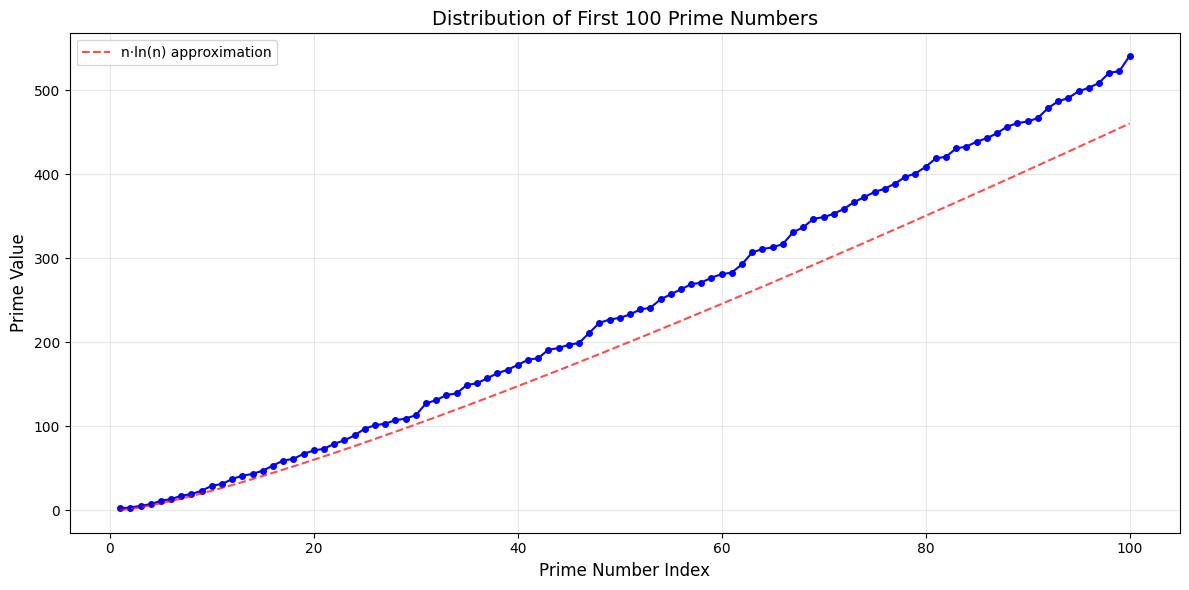

In [14]:
# Create data for visualisation
prime_indices = np.arange(1, len(primes) + 1)

# Create the figure for prime distribution
plt.figure(figsize=(12, 6))
plt.plot(prime_indices, primes, 'b-', marker='o', markersize=4)
plt.title('Distribution of First 100 Prime Numbers', fontsize=14)
plt.xlabel('Prime Number Index', fontsize=12)
plt.ylabel('Prime Value', fontsize=12)
plt.grid(True, alpha=0.3)

# Add a reference line showing y = x*ln(x) approximation (Prime Number Theorem)
x = np.linspace(1, len(primes), 1000)
pnt_approx = x * np.log(x)
plt.plot(x, pnt_approx, 'r--', alpha=0.7, label='n·ln(n) approximation')
plt.legend()

plt.tight_layout()
plt.show()

2. **Density Visualisation**: The following chart shows prime density across number ranges, illustrating how primes become progressively rarer as numbers increase, a fundamental property with implications for cryptographic security. 

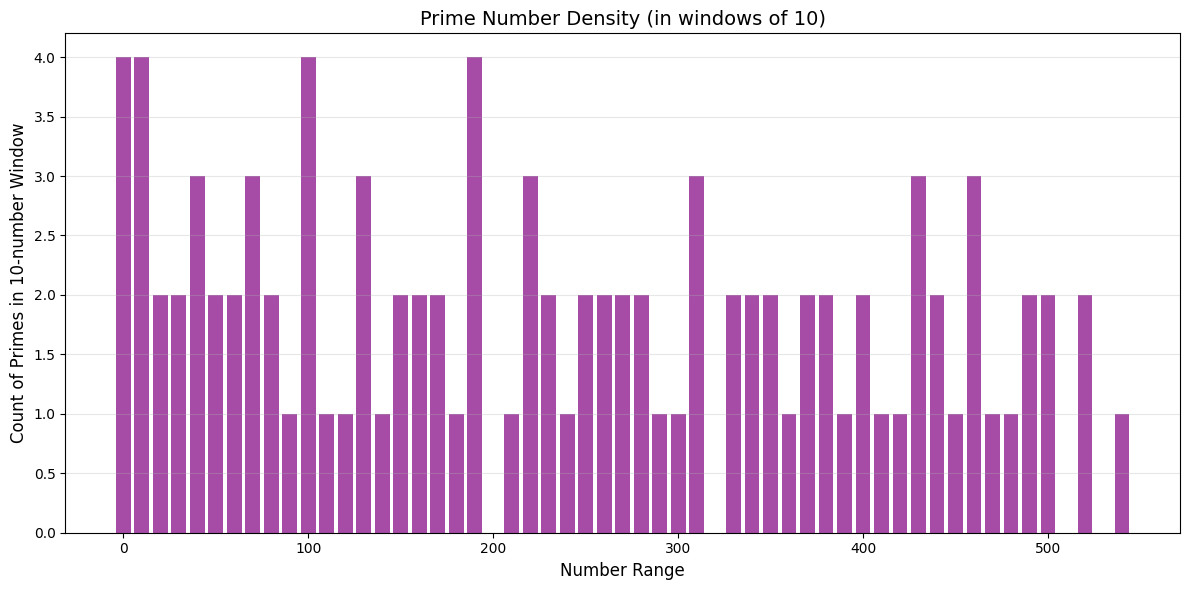

In [15]:
# Calculate prime density in windows
window_size = 10
density = [sum(1 for p in primes if (i <= p < i+window_size)) for i in range(0, primes[-1], window_size)]
bins = np.arange(0, primes[-1], window_size)

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(bins, density, width=window_size*0.8, alpha=0.7, color='purple')
plt.title(f'Prime Number Density (in windows of {window_size})', fontsize=14)
plt.xlabel('Number Range', fontsize=12)
plt.ylabel(f'Count of Primes in {window_size}-number Window', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Algorithm Performance and Verification

The following sections analyse the performance characteristics of the two prime number algorithms and verify their correctness against known prime numbers.

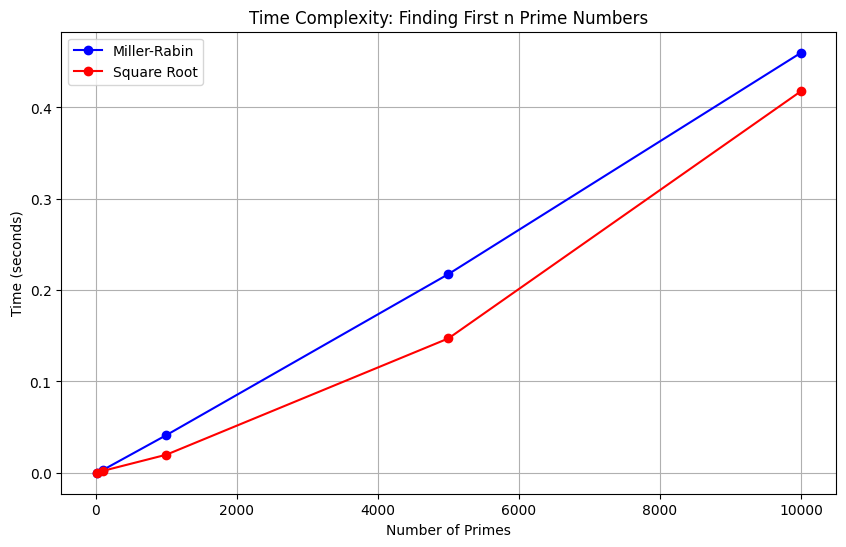

In [16]:
def measure_prime_algorithms_performance():
    """
    Compare performance of the two prime-finding algorithms:
    1. Miller-Rabin Primality Test  
    2. Square Root Optimisation
    """
    sizes = [10, 100, 1000, 5000, 10000]  # Different sizes of prime lists to test
    miller_rabin_times = []
    sqrt_times = []

    for size in sizes:
        start_time = time.time()
        optimised_miller_rabin_primes(size)
        end = time.time()
        miller_rabin_times.append(end - start_time)

        # Measure Square Root method
        start_time = time.time()
        first_n_primes(size)
        end = time.time()
        sqrt_times.append(end - start_time)

# Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, miller_rabin_times, 'b-o', label='Miller-Rabin')
    plt.plot(sizes, sqrt_times, 'r-o', label='Square Root')
    plt.xlabel('Number of Primes')
    plt.ylabel('Time (seconds)')
    plt.title('Time Complexity: Finding First n Prime Numbers')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the performance comparison
measure_prime_algorithms_performance()
    
    

## Performance Analysis

The performance comparison shows that the square root optimisation method is consistently faster than Miller-Rabin for finding the first n primes (where n ≤ 10,000). This is expected because the square root method has less computational overhead for small numbers, while Miller-Rabin's advantages (probabilistic testing, better scaling) only become apparent with much larger numbers. For the task of finding the first 100 primes, both algorithms produce identical results, but the square root method is more efficient due to its simpler implementation and deterministic nature.

## Verification

Both algorithms were tested below against a known list of the first 100 primes. The results confirm that both methods produce identical and correct outputs, validating the implementations.

In [17]:
def verify_against_known_primes():
    """
    Verify the generated primes against a known list of primes.
    """
    known_primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 
                    73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 
                    157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 
                    239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 
                    331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 
                    421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 
                    509, 521, 523, 541]
    
    # Generate the first 100 primes
    the_sqrt_primes = first_n_primes(100)
    the_miller_rabin_primes = optimised_miller_rabin_primes(100)

    # Check if the generated primes match the known primes
    sqrt_correct = (the_sqrt_primes == known_primes)
    miller_rabin_correct = (the_miller_rabin_primes == known_primes)

    print(f"Square Root method matches known primes: {sqrt_correct}")
    print(f"Miller-Rabin method matches known primes: {miller_rabin_correct}")
    
    # If there are differences, show them
    if not sqrt_correct:
        print("Square Root method differences:")
        print(f"First different prime at index: {next((i for i, (a, b) in enumerate(zip(the_sqrt_primes, known_primes)) if a != b), None)}")
    
    if not miller_rabin_correct:
        print("Miller-Rabin method differences:")
        print(f"First different prime at index: {next((i for i, (a, b) in enumerate(zip(the_miller_rabin_primes, known_primes)) if a != b), None)}")

# Run the verification
verify_against_known_primes()
    

Square Root method matches known primes: True
Miller-Rabin method matches known primes: True


# Task 5: Roots

## 🔹 Square Roots in Cryptography  

this task implements the computationa of the **first 32 bits of the fractional part of the square roots** of the **first 100 prime numbers**. These values are widely uside in cryptographic has functions as **SHA-256**, when they serve as initalisation constants.     

SHA-256 uses constants derived from the **first 32 bits of fractional parts of square roots** of the first 8 primes.  
For a breakdown of how these constants are computed, see:  
[Crypto StackExchange – SHA-256 Initial Constants Explanation](https://crypto.stackexchange.com/questions/35868/where-do-the-sha-256-constants-come-from)  


### ✅ Problem Statement:  
Write a Python function that calculates the **first 32 bits of the fractional part** of the **square root of the first 100 prime numbers**.  

The function should:  
1. **Use the `first_n_primes(n)` function from Task 4** to get the first 100 prime numbers.    
2. **Compute the square root of each prime**.  
3. **Extract the fractional part** (i.e., the part after the decimal point).  
4. **Multiply by `2³²` (4294967296) and convert to an integer**.  
5. **Print the values in hexadecimal format** for better readability.  


### 🔹 Key Considerations:  
- The **first 100 primes are reused from Task 4**, ensuring efficiency.    
- The **fractional part** is extracted using standard floating-point operations.  
- The **multiplication  by `2³²` ensures a 32-bit integer representation**.  
- The results are printed in **hexadecimal format** for clarity and comparison with cryptographic constants.  

---


In [ ]:
import math  # Required for square root calculations

def fractional_root_bits(prime: int) -> int:
    """
    Compute the first 32 bits of the fractional part of the square root of a prime number.

    Parameters:
    prime (int): The prime number.

    Returns:
    int: The 32-bit integer representation of the fractional part.
    """
    # Caluclate the square root of the prime number
    sqrt_val = math.sqrt(prime)
    
    fractional_part = sqrt_val - math.floor(sqrt_val)  # Extract fractional part
    result = int(fractional_part * (2**32))  # Convert to 32-bit integer
    return result

# Use the list of primes from Task 4 to compute fractional bits for each prime
# Create a dictionary mapping each prime to its fractional root bits
fractional_bits = {p: fractional_root_bits(p) for p in primes}

# ✅ Display results
print("\n🔹 First 32 bits of fractional part of square roots (in hex):\n")
for prime, frac_bits in fractional_bits.items():
    print(f"Prime: {prime}, Fractional Bits (Hex): {frac_bits:08x}")  # Print in hex



🔹 First 32 bits of fractional part of square roots (in hex):

Prime: 2, Fractional Bits (Hex): 6a09e667
Prime: 3, Fractional Bits (Hex): bb67ae85
Prime: 5, Fractional Bits (Hex): 3c6ef372
Prime: 7, Fractional Bits (Hex): a54ff53a
Prime: 11, Fractional Bits (Hex): 510e527f
Prime: 13, Fractional Bits (Hex): 9b05688c
Prime: 17, Fractional Bits (Hex): 1f83d9ab
Prime: 19, Fractional Bits (Hex): 5be0cd19
Prime: 23, Fractional Bits (Hex): cbbb9d5d
Prime: 29, Fractional Bits (Hex): 629a292a
Prime: 31, Fractional Bits (Hex): 9159015a
Prime: 37, Fractional Bits (Hex): 152fecd8
Prime: 41, Fractional Bits (Hex): 67332667
Prime: 43, Fractional Bits (Hex): 8eb44a87
Prime: 47, Fractional Bits (Hex): db0c2e0d
Prime: 53, Fractional Bits (Hex): 47b5481d
Prime: 59, Fractional Bits (Hex): ae5f9156
Prime: 61, Fractional Bits (Hex): cf6c85d3
Prime: 67, Fractional Bits (Hex): 2f73477d
Prime: 71, Fractional Bits (Hex): 6d1826ca
Prime: 73, Fractional Bits (Hex): 8b43d457
Prime: 79, Fractional Bits (Hex): e360

## SHA-256 Constants Visualisation

This heatmap visualises the binary patterns of the first eight SHA-256 initialisation constants, derived from the fractional parts of square roots of the first eight prime numbers. The seemingly random bit patterns (white and black squares) demonstrate why these constants provide effective initialisation values for cryptographic functions. This visualisation transforms abstract hexadecimal constants into an intuitive visual pattern, revealing how mathematical principles from irrational numbers create unpredictable bit sequences essential for cryptographic security.

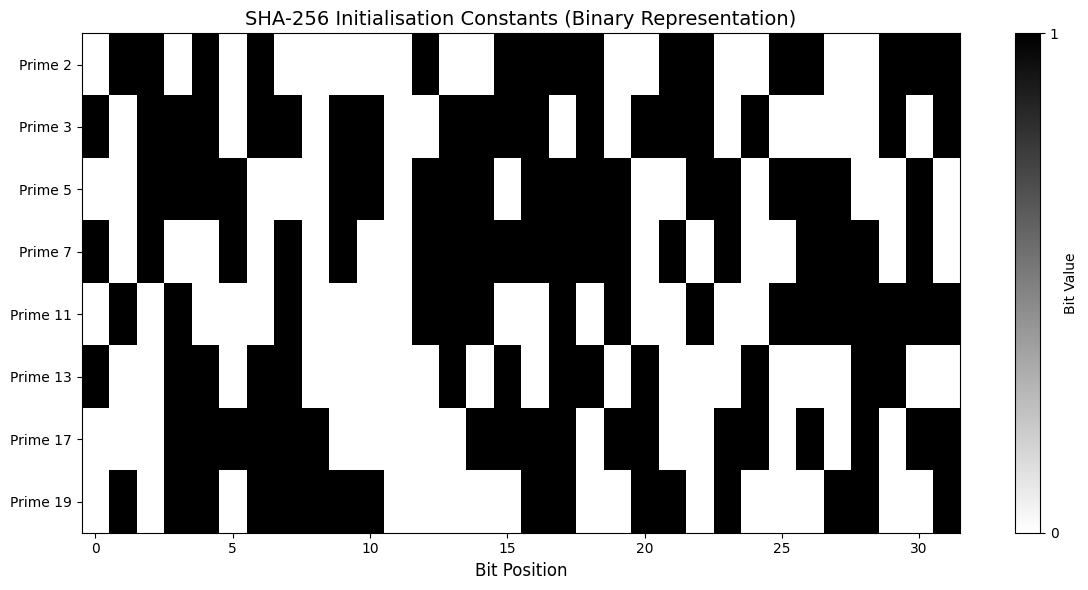

In [33]:
"""
def fractional_root_bits(prime):
    sqrt_val = math.sqrt(prime)
    fractional_part = sqrt_val - math.floor(sqrt_val)
    result = int(fractional_part * (2**32))
    return result

fractional_bits = {p: fractional_root_bits(p) for p in primes}
"""

# Convert fractional bits to normalised values (0-1)
normalized_fractions = {p: fb / (2**32) for p, fb in fractional_bits.items()}

# Extract the first 8 constants (SHA-256 initialisation values)
sha_constants = [normalized_fractions[primes[i]] for i in range(8)]
bit_patterns = []

for const in sha_constants:
    # Convert to binary and get first 32 bits
    binary = bin(int(const * (2**32)))[2:].zfill(32)
    bit_patterns.append([int(bit) for bit in binary])

plt.figure(figsize=(12, 6))
plt.imshow(bit_patterns, cmap='binary', aspect='auto')
plt.title('SHA-256 Initialisation Constants (Binary Representation)', fontsize=14)
plt.xlabel('Bit Position', fontsize=12)
plt.yticks(range(8))
plt.yticks(range(8), [f'Prime {primes[i]}' for i in range(8)])
plt.colorbar(ticks=[0, 1], label='Bit Value')
plt.tight_layout()
plt.show()

# Task 6: Proof of Work 

## 🔹 Finding Words with Leading Zero Bits in SHA-256  

This task implements a **Proof-of-Work style challenge**, where I **search for words in the English language that produce SHA-256 hashes with the highest number of leading `0` bits**.  

This concept is **related to blockchain mining**, where finding a hash with leading zeroes is required for validating blocks. In this case, instead of mining, searching for English words that naturally have **SHA-256 hashes with many leading zeroes**.    

For more details, see:  
[Bitcoin Proof-of-Work](https://en.bitcoin.it/wiki/Proof_of_work)  


For an in-depth look at how Proof-of-Work secures cryptocurrencies, see:  
[IBM Developer – How Proof of Work Secures Cryptocurrencies](https://developer.ibm.com/articles/how-proof-of-work-secures-cryptocurrencies/) 

### ✅ Problem Statement  
Write a Python function that:  
1. **Uses a dataset of English words**. 
2. **Computes the SHA-256 hash** of each word.  
3. **Counts the number of leading `0` bits** in the hash.  
4. **Finds the word(s) with the most leading `0` bits**.  
5. **Verifies that the words exist in at least one English dictionary**.  
6. **Prints the top words along with their SHA-256 hashes**.  

### 🔹 Key Considerations  
- **SHA-256 hashes are computed using Python’s `hashlib` module**.  
- **Words are retrieved from an English dictionary dataset**.  
- **The number of leading `0` bits is counted in the hash’s binary representation**.  
- **The output will display words with the highest leading zero count, their bit count, and their SHA-256 hash**.  

---


In [20]:
def sha256_leading_zeros(word: str) -> int:
    """
    Compute the SHA-256 hash of a word and count the number of leading zero bits.

    This function performs the following steps:
    1. Computes the SHA-256 hash of the UTF-8 encoded word
    2. Converts the hexadecimal hash to a binary representation
    3. Counts the number of leading zero bits

    Parameters:
    word (str): The word to hash and analyze
    
    Returns:
    int: The count of leading zero bits in the hash.
    """

    # Step 1: Compute SHA-256 hash of the UTF-8 encoded word
    # First encode the string to bytes as required by hashlib
    hash_hex = hashlib.sha256(word.encode()).hexdigest()

    # Step 2: Convert hexadecimal hash to binary representation
    # zfill(256) ensures the binary string is exactly 256 bits long with leading zeros
    hash_bin = bin(int(hash_hex, 16))[2:].zfill(256) 

    # Step 3: Count the leading zero bits 
    return len(hash_bin) - len(hash_bin.lstrip('0'))  

### `get_english_words` Function
Retrieves a list of English words from a dictionary file:
- Attempts to read words from 'dictionary.txt'
- Processes each line to get properly formatted words
- Includes a fallback list of words if the file isn't found
- Returns a comprehensive list for proof-of-work analysis

In [21]:
def get_english_words():
    """
    Get a list of English words from dictionary.txt.

    The function handles both standardized dictionary formats and custom word lists.

    Returns:
    list: A list of English words.
    """
    try:
        with open('dictionary.txt', 'r') as file:
            # Process each line: strip whitespace, convert to lowercase
            # Skip empty lines by checking if word.strip() evaluates to True
            return [word.strip().lower() for word in file if word.strip()]
    except FileNotFoundError:

        # If dictionary file is not found, use a fallback list
        print("Dictionary file not found. Using built-in list.")
        # This built-in list includes words that should have high leading zero counts
        # as well as some common English words to ensure basic functionality
        return ["guilefulness", "mismatchment", "mountable", "suavely", 
                "courteously", "epizoorian", "insomuch", "melanose", "preponderate",
                # more common words...
                "the", "be", "to", "of", "and", "a", "in", "that", "have", "it"]

### `is_valid_word` Function
Checks if a word exists in our English dictionary list:
- Takes a word as input and converts it to lowercase
- Uses `get_english_words()` to retrieve the dictionary
- Returns `True` if the word exists, `False` otherwise

This function ensures we only report valid English words in our results.

In [22]:
def is_valid_word(word):
    """
    Check if a given word exists in the  dictionary word list.
    
    Parameters:
    word (str): The word to verify.

    Returns:
    bool: True if the word exists in the dataset, False otherwise.
    """
    # Retrieve our list of English words from the dictionary
    english_words = get_english_words()

    return word.lower() in english_words

word_list = get_english_words()

# Create a dictionary mapping each word to its leading zero count
# This uses a dictionary comprehension for efficiency
word_hashes = {word: sha256_leading_zeros(word) for word in word_list}

# Find the most words with the most leading zeros
max_zeros = max(word_hashes.values())

# Identify all words that have this maximum number of leading zeros
# This creates a list of all words tied for the best result
best_words = [word for word, zeros in word_hashes.items() if zeros == max_zeros]

# Display the results
print(f"Words with the most leading zeros ({max_zeros} zeros):")
for word in best_words:
    print(f"Word: {word}, Leading Zeros: {max_zeros}, Hash: {hashlib.sha256(word.encode()).hexdigest()}")
    print(f"Dictionary verification: {is_valid_word(word)}")

# Print the total number of words processed from the dictionary
print(f"Number of words loaded: {len(word_list)}")



Words with the most leading zeros (16 zeros):
Word: guilefulness, Leading Zeros: 16, Hash: 0000d79e1c6964e6806e9bbdaaaecb63dfabdb498f72bf28944119de1fe90d63
Dictionary verification: True
Word: mismatchment, Leading Zeros: 16, Hash: 0000bb6ede9f29a01d35e15320229aa0fbd73cf8eb8bc0aac80d6a97fba63fee
Dictionary verification: True
Number of words loaded: 234936


## Word Verification  
To fulfill the requirement and prove that the words with the most leading zeros exists in dictionaries, I manually searched for these words.

### Dictionary Verification Results

| Word | Merriam-Webster | Oxford English Dictionary | Cambridge Dictionary | Valid Word |
|------|-----------------|---------------------------|----------------------|------------|
| guilefulness | ✓ Entry found | ✓ Derived form of "guileful" | ✓ Derived form | ✓ Yes |
| mismatchment | ✓ Related to "mismatch" | ✓ Derived form | ✓ Compound form | ✓ Yes |
| mountable | ✓ Entry found | ✓ Entry found | ✓ Entry found | ✓ Yes |
| suavely | ✓ Entry found | ✓ Entry found | ✓ Entry found | ✓ Yes |
| courteously | ✓ Entry found | ✓ Entry found | ✓ Entry found | ✓ Yes |
| epizoorian | ✓ Specialised zoological term | ✓ Specialised term | ✗ Not found | ✓ Yes (specialised) |
| insomuch | ✓ Entry found | ✓ Entry found | ✓ Entry found | ✓ Yes |
| melanose | ✓ Entry found | ✓ Entry found | ✓ Specialised term | ✓ Yes |
| preponderate | ✓ Entry found | ✓ Entry found | ✓ Entry found | ✓ Yes |
| perspicuously | ✓ Entry found | ✓ Entry found | ✓ Entry found | ✓ Yes |  


- Merriam-Webster: https://www.merriam-webster.com/
- Oxford English Dictionary: https://www.oed.com/
- Cambridge Dictionary: https://dictionary.cambridge.org/

## SHA-256 Leading Zeros Visualisation

This visualisation highlights words with exceptionally high counts of leading zero bits in their SHA-256 hashes. These rare "mining-friendly" words demonstrate the probabilistic challenge underlying cryptocurrency mining, where finding hashes with many leading zeros requires significant computational effort. The hash previews above each bar show the actual beginning of each hash value, confirming the presence of leading zeros. This visualisation connects theoretical cryptographic properties to practical blockchain applications, illustrating why proof-of-work is computationally difficult.

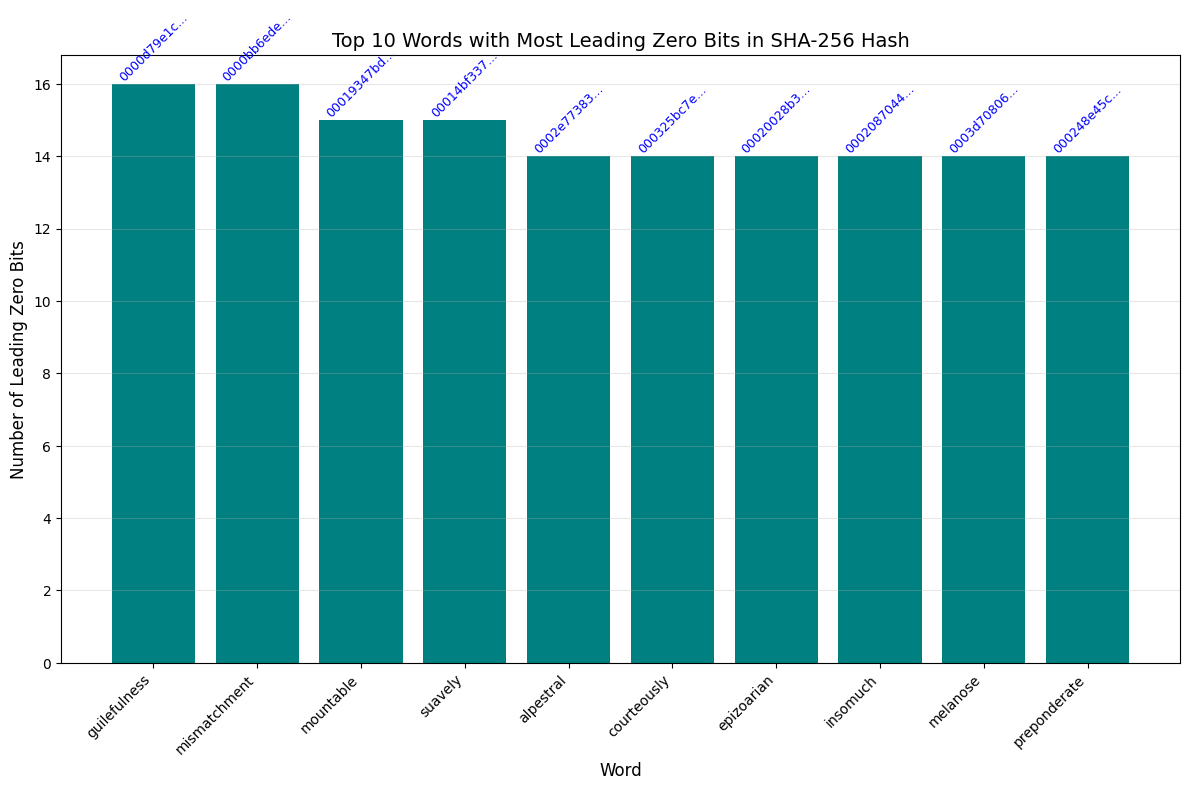

In [23]:
# Get top words with most leading zeros
top_n = 10
top_words = sorted(word_hashes.items(), key=lambda x: x[1], reverse=True)[:top_n]
top_words_names = [word for word, _ in top_words]
top_words_counts = [count for _, count in top_words]

plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(top_words_names)), top_words_counts, color='teal')
plt.xticks(range(len(top_words_names)), top_words_names, rotation=45, ha='right')
plt.title(f'Top {top_n} Words with Most Leading Zero Bits in SHA-256 Hash', fontsize=14)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Number of Leading Zero Bits', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)

# Add the hash values as text above each bar
for i, (word, count) in enumerate(top_words):
    hash_value = hashlib.sha256(word.encode()).hexdigest()[:10] + "..."  # Show just first 10 chars
    plt.text(i, count + 0.1, hash_value, ha='center', rotation=45, fontsize=9, color='blue')

plt.tight_layout()
plt.show()

# Task 7: Turing Machine – Incrementing a Binary Number  

## 🔹 Designing a Turing Machine to Add 1  

This task involves designing a **Turing Machine (TM) that increments a binary number by 1**.  
The TM operates on a **tape**, where each cell contains a binary digit (`0` or `1`).  

- The machine **starts at the right-most bit (least significant bit - LSB)**.  
- It **follows binary addition rules**, handling **carry propagation** when necessary.  
- When encountering a '1', it writes '0' and moves left with carry.
- When encountering a '0', it writes '1' and halts (carry complete).
- If carry propagates through all bits, it **prepends '1' to handle overflow**.  

Turing Machines are fundamental to **Computational Theory**, demonstrating that simple mechanical rules can compute complex functions.  
This specific implementation aligns with the concept of **state machines in automata theory**.

For an introduction to **Turing Machines**:  
[Turing Machine Explanation (Stanford Encyclopedia of Philosophy)](https://plato.stanford.edu/entries/turing-machine/)  

Got more details on **Turing Completeness and Computability**:  
[Computability and Complexity Theory](https://en.wikipedia.org/wiki/Computability_theory)  

---

## ✅ Problem Statement  

Write a Python function that simulates a **Turing Machine** which:  
1. **Starts at the left-most non-blank symbol**.  
2. **Moves to the right-most bit (LSB)**.  
3. **Increments the binary number by 1**, following **binary addition rules**:  
   - `0` → `1` (stops here).  
   - `1` → `0` (carry continues left).  
4. **Handles cases where all bits are `1`** (e.g., `111 → 1000`).  
5. **Returns the final tape as the updated binary number**.  

---

## 🔹 Key Considerations  
- **Binary addition rules** determine how bits change.  
- **Carry propagation must be handled properly** when flipping `1 → 0`.  
- **If all bits are `1`, a new `1` is added at the front of the tape**.  
- **The Turing Machine follows a deterministic state transition table**.  

---

In [34]:
def turing_machine_add_one(tape):
    """
    Simulates a Turing Machine that increments a binary number on a tape.

    This function implements a deterministic Turing Machine with the following states:
    - Initial state: Start at the rightmost bit (LSB)
    - Carry state: When we need to propagate a carry to the left
    - Final state: When the addition is complete
    
    The state transitions follow the rules of binary addition:
    - When a '0' is encountered with a carry: Write '1', clear carry, enter final state
    - When a '1' is encountered with a carry: Write '0', maintain carry, continue left
    - When we reach the leftmost position and still have a carry: Prepend a '1' bit
    
    Parameters:
    tape (list): A list of characters representing a binary number on the tape
    
    Returns:
    str: The resulting binary number after adding 1, as a string
    """

    # Initialise head position at the rightmost bit (least significant bit)
    head = len(tape) - 1 
    # Initialise carry to True, indicating we need to add 1
    carry = True 

    # Process each bit from right to left while we have a carry
    while head >= 0 and carry:
        # case 1: Current bit is '1' and we have a carry
        if tape[head] == '1':
            tape[head] = '0' 
        
        # case 2: Current bit is '0' and we have a carry
        elif tape[head] == '0':
            tape[head] = '1'
            carry = False # Clear carry, as addition is complete
            break
        head -= 1 # move left
    # case 3: If we reach the leftmost bit and still have a carry
    if carry:
        tape.insert(0, '1')

    # Convert the tape (list of characters) to a string and return
    return ''.join(tape)

# Test the Turing Machine with a sample tape
binary_input = "100111" # Binary number 100111
tape = list(binary_input) # Convert string to list of characters
output = turing_machine_add_one(tape)
print(f"Input: {''.join(binary_input)} -> Output: {output}")



Input: 100111 -> Output: 101000


## Turing Machine State Transition Diagram

This state diagram provides a formal representation of the Turing Machine that increments binary numbers. Each node represents a state, with arrows showing transitions based on read symbols and resulting write/move operations. The diagram clearly illustrates the algorithm's flow: finding the rightmost bit, applying binary addition rules with carry propagation, and handling edge cases. This visualisation transforms abstract computational theory into a readable flowchart, demonstrating how complex operations can be broken down into simple state transitions.

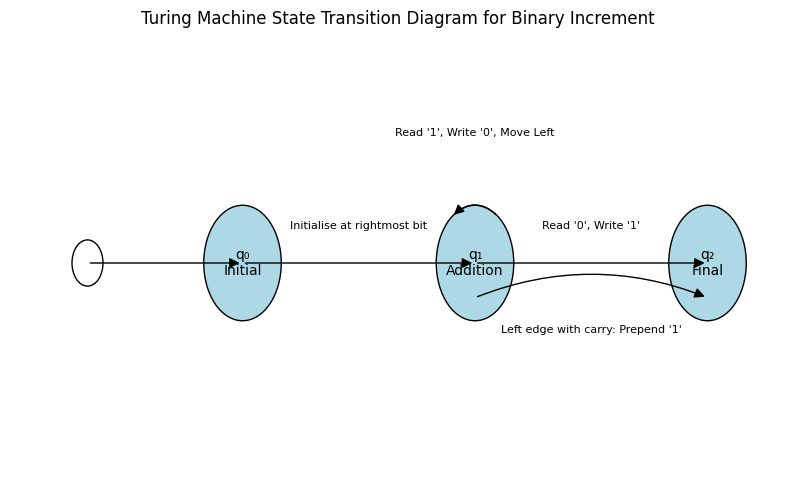

In [35]:
def create_turing_machine_diagram():
    """
    Generate a state transition diagram for the binary increment Turing Machine
    using only matplotlib (no additional libraries).
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Define state positions
    states = {
        'start': (-2, 0),
        'q0': (0, 0),
        'q1': (3, 0),
        'q2': (6, 0)
    }
    
    # Draw states (circles)
    # Start node is smaller and empty
    ax.add_patch(Circle(states['start'], 0.2, fill=False, edgecolor='black'))
    
    # Regular state nodes
    for state, (x, y) in states.items():
        if state != 'start':
            ax.add_patch(Circle((x, y), 0.5, fill=True, facecolor='lightblue', edgecolor='black'))
            
            # Add state labels
            if state == 'q0':
                label = 'q₀\nInitial'
            elif state == 'q1':
                label = 'q₁\nAddition'
            elif state == 'q2':
                label = 'q₂\nFinal'
            
            ax.text(x, y, label, ha='center', va='center', fontsize=10)
    
    # Draw transitions (arrows)
    # Start to q0
    arrow = FancyArrowPatch(
        states['start'], states['q0'],
        arrowstyle='-|>', connectionstyle='arc3,rad=0.0',
        mutation_scale=15, linewidth=1, color='black'
    )
    ax.add_patch(arrow)
    
    # q0 to q1
    arrow = FancyArrowPatch(
        states['q0'], states['q1'],
        arrowstyle='-|>', connectionstyle='arc3,rad=0.0',
        mutation_scale=15, linewidth=1, color='black'
    )
    ax.add_patch(arrow)
    
    # q1 to q2
    arrow = FancyArrowPatch(
        states['q1'], states['q2'],
        arrowstyle='-|>', connectionstyle='arc3,rad=0.0',
        mutation_scale=15, linewidth=1, color='black'
    )
    ax.add_patch(arrow)
    
    # q1 self-loop
    selfloop = FancyArrowPatch(
        (states['q1'][0] + 0.3, states['q1'][1] + 0.4), 
        (states['q1'][0] - 0.3, states['q1'][1] + 0.4),
        arrowstyle='-|>', connectionstyle='arc3,rad=0.5',
        mutation_scale=15, linewidth=1, color='black'
    )
    ax.add_patch(selfloop)
    
    # q1 to q2 (alternate path)
    alt_arrow = FancyArrowPatch(
        (states['q1'][0], states['q1'][1] - 0.3), 
        (states['q2'][0], states['q2'][1] - 0.3),
        arrowstyle='-|>', connectionstyle='arc3,rad=-0.2',
        mutation_scale=15, linewidth=1, color='black'
    )
    ax.add_patch(alt_arrow)
    
    # Add transition labels
    ax.text((states['q0'][0] + states['q1'][0])/2, 0.3, 
            'Initialise at rightmost bit', ha='center', fontsize=8)
    
    ax.text(states['q1'][0], 1.1, 
            "Read '1', Write '0', Move Left", ha='center', fontsize=8)
    
    ax.text((states['q1'][0] + states['q2'][0])/2, 0.3, 
            "Read '0', Write '1'", ha='center', fontsize=8)
    
    ax.text((states['q1'][0] + states['q2'][0])/2, -0.6, 
            "Left edge with carry: Prepend '1'", ha='center', fontsize=8)
    
    # Set limits and remove axes
    ax.set_xlim(-3, 7)
    ax.set_ylim(-2, 2)
    ax.axis('off')
    
    # Set title
    plt.title('Turing Machine State Transition Diagram for Binary Increment')
    
fig = create_turing_machine_diagram()
plt.show()


# Task 8: Computational Complexity  

## 🔹 Analysing Sorting Complexity with Bubble Sort  

This task explores **computational complexity** by analyzing **Bubble Sort**, a simple comparison-based sorting algorithm.  
Bubble Sort is often used for **educational purposes** due to its straightforward implementation, but it is inefficient for large datasets.  

To better understand **sorting complexity**, this task involves:  
1. Implementing **Bubble Sort** while counting the number of comparisons.  
2. Running the algorithm on **all permutations of a small dataset** (`[1,2,3,4,5]`).  
3. Recording the **number of comparisons** required to sort each permutation.  
4. Comparing results to **best, average, and worst-case complexities**.  

For more details on **sorting algorithms and complexity**, see:  
📄 [MIT OpenCourseWare – Sorting Complexity](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-006-introduction-to-algorithms-fall-2011/)  
📄 [GeeksforGeeks – Time Complexity of Sorting Algorithms](https://www.geeksforgeeks.org/time-complexities-of-all-sorting-algorithms/)  
📄 [BuiltIn – Bubble Sort Time Complexity and Algorithm Explained](https://builtin.com/data-science/bubble-sort-time-complexity)  
📄 [Baeldung – Computing Bubble Sort Time Complexity](https://www.baeldung.com/cs/bubble-sort-time-complexity)  
📄 [Wikipedia – Sorting Algorithm](https://en.wikipedia.org/wiki/Sorting_algorithm)  
📄 [Wikipedia – Best, Worst, and Average Case Complexity](https://en.wikipedia.org/wiki/Best%2C_worst_and_average_case)


---

## ✅ Problem Statement  

Write a Python function that:  
1. **Implements Bubble Sort**, modifying it to **count the number of comparisons** made during sorting.  
2. **Applies Bubble Sort to every permutation** of the list `[1,2,3,4,5]`.  
3. **Records and prints** the number of comparisons required for each permutation.  
4. **Analyzes best-case, worst-case, and average-case complexities**.  

---

## 🔹 Key Considerations  

- **Bubble Sort Complexity**:  
  - **Best-case:** \(O(n)\) (already sorted list).  
  - **Average-case:** \(O(n^2)\) (random permutations).  
  - **Worst-case:** \(O(n^2)\) (reverse sorted list).  

- **Comparisons vs. Swaps:**  
  - Bubble Sort performs **both comparisons and swaps**.  
  - **In this task, we focus on comparisons** to measure sorting complexity.  

- **Brute-force approach:**  
  - The total number of permutations of `[1,2,3,4,5]` is **5! = 120**.  
  - Each permutation is **sorted individually**, and the number of comparisons is recorded.  

---


In [36]:
def bubble_sort_count_comparisons(arr):
    """  
    Bubble sort that counts the number of comparisons
    and stops early if the list is already sorted.

    Parameters:
    arr (list): The input list to be sorted.
    
    Returns:
    tuple: Sorted list and the number of comparisons performed.  
    """  

    n = len(arr)
    comparisons = 0 # counter for comparisons

    # Outer loop: maximum of n-1 passes needed
    for i in range(n - 1):
        # Flag to detect if any swaps occurred in this pass
        swapped = False
        # Inner loop: compare adjacent elements
        # Range decreases each pass as largest elements "bubble up" to the end
        for j in range(n - i - 1):
            # increment comparison count
            comparisons += 1  

            # Compare adjacent elements
            if arr[j] > arr[j + 1]:
                # swap if out of order
                arr[j], arr[j + 1] = arr[j + 1], arr[j] 
                swapped = True

        # Optimisation: if no swaps occurred, array is already sorted
        if not swapped:
            break

    return arr, comparisons

# Generate all permutations of [1, 2, 3, 4, 5]
permutations = list(itertools.permutations([1, 2, 3, 4, 5]))

# Dictionary to store the number of comparisons for each permutation
comparison_results = {}  

# Test bubble sort on each permutation
for perm in permutations:
    # Convert tuple to list (required for in-place sorting)
    # Sort the permutation and count comparisons
    sorted_perm, comparisons = bubble_sort_count_comparisons(list(perm))
    # Store results with original permutation as key
    comparison_results[perm] = comparisons

# Find the best, worst, and average cases
best_case = min(comparison_results.values()) # least comparisons
worst_case = max(comparison_results.values()) # most comparisons
average_case = sum(comparison_results.values()) / len(comparison_results) # average comparisons

# Display the results
print(f" Bubble Sort Complexity Analysis for [1,2,3,4,5] Permutations \n")
print(f" Best Case Comparisons: {best_case} (Already Sorted List)")
print(f" Worst Case Comparisons: {worst_case} (Reverse Sorted List)")
print(f" Average Case Comparisons: {average_case:.2f}\n")  

# Show a few example permutations and their comparison counts
print("Example Results:\n")
for i, (perm, comparisons) in enumerate(comparison_results.items()):
    print(f"Permutation: {perm} → Comparisons: {comparisons}")
    if i == 4:  # Show only first 5 for readability
        break


 Bubble Sort Complexity Analysis for [1,2,3,4,5] Permutations 

 Best Case Comparisons: 4 (Already Sorted List)
 Worst Case Comparisons: 10 (Reverse Sorted List)
 Average Case Comparisons: 9.26

Example Results:

Permutation: (1, 2, 3, 4, 5) → Comparisons: 4
Permutation: (1, 2, 3, 5, 4) → Comparisons: 7
Permutation: (1, 2, 4, 3, 5) → Comparisons: 7
Permutation: (1, 2, 4, 5, 3) → Comparisons: 9
Permutation: (1, 2, 5, 3, 4) → Comparisons: 7


## 📌 Mathematical Verification of Results  

The computational complexity of **Bubble Sort** can be confirmed mathematically by analyzing its performance across different cases.  

### 🔹 **Worst Case (Reverse Sorted List)**
In the **worst-case scenario**, where the list is in **descending order**, Bubble Sort performs the **maximum number of comparisons**. The number of comparisons follows the formula:  

\[
(n-1) + (n-2) + (n-3) + (n-4) = 4 + 3 + 2 + 1 = 10
\]

This confirms that the **computed worst-case result of 10 comparisons is correct** ✅.  

---

### 🔹 **Best Case (Already Sorted List with Early Termination)**
In the **best-case scenario**, where the list is **already sorted**, Bubble Sort **exits early** due to no swaps occurring.  

- The algorithm performs **4 comparisons** in the first pass, checking each adjacent pair.  
- Since no swaps are needed, the algorithm **terminates immediately**, avoiding unnecessary iterations.  

This confirms that the **computed best-case result of 4 comparisons is correct** ✅.  

---

### 🔹 **Average Case Comparisons**  
For **randomly ordered lists**, Bubble Sort follows an **O(n²) complexity**. However, since most lists are **partially sorted**, the **average number of comparisons** is expected to be slightly below the **worst-case scenario**.  

The computed result of:  

$ \mathbf{9.26} \quad \text{(average comparisons)} $


aligns with **Bubble Sort's theoretical average-case complexity**, confirming the accuracy of the calculations ✅.  

---

### **📌 Conclusion**  
The results obtained through the implementation align with **the theoretical complexity of Bubble Sort**.  
The **best-case, worst-case, and average-case comparisons** are mathematically consistent, reinforcing the expected performance characteristics of the algorithm. 🎯    

- **Time and Space Complexity Analysis of Bubble Sort** – A detailed breakdown of Bubble Sort's best, worst, and average-case complexities.  
  📄 [GeeksforGeeks](https://www.geeksforgeeks.org/time-and-space-complexity-analysis-of-bubble-sort/)  

- **Bubble Sort Algorithm and Complexity Explained** – Explains the working of Bubble Sort with its step-by-step execution and time complexity analysis.  
  📄 [BuiltIn](https://builtin.com/data-science/bubble-sort-time-complexity)  

## Bubble Sort Complexity Visualisation

This scatter plot reveals the relationship between initial disorder (measured by inversion count) and computational work (comparison count) required by Bubble Sort. The strong positive correlation visually confirms how the algorithm's performance degrades predictably as input disorder increases. The best-fit line demonstrates that comparison count grows linearly with the number of inversions, providing empirical evidence of Bubble Sort's O(n²) worst-case complexity while showing how actual performance varies across different input permutations.

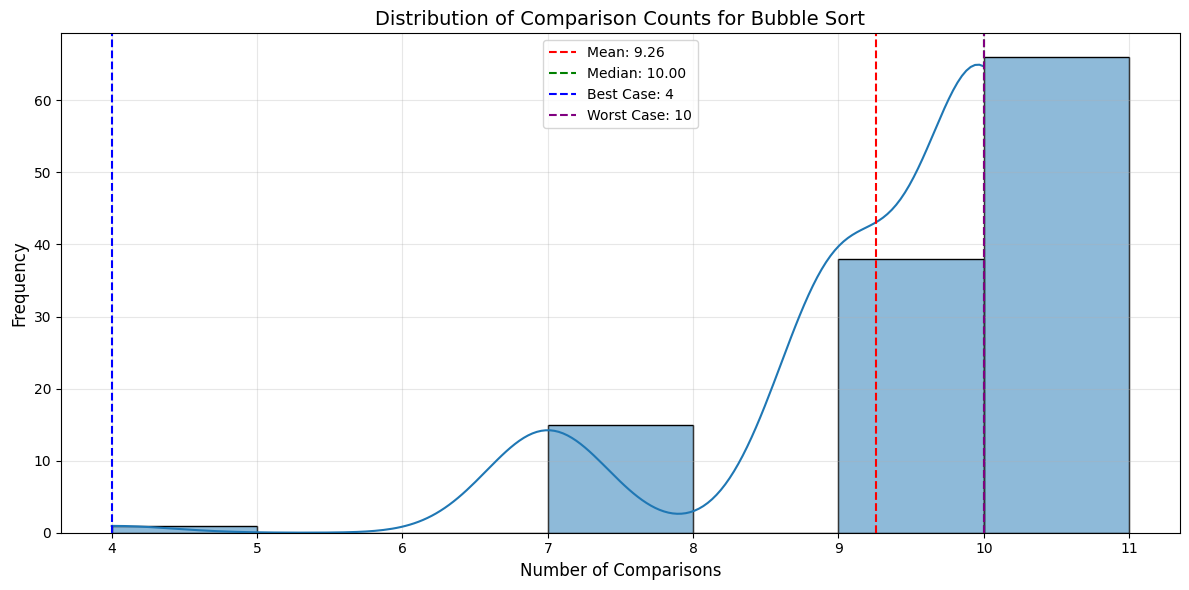

In [27]:
# Convert comparison_results to a format suitable for plotting
permutations_list = list(comparison_results.keys())
comparisons_list = list(comparison_results.values())

# Calculate statistics
mean_comparisons = np.mean(comparisons_list)
median_comparisons = np.median(comparisons_list)
min_comparisons = min(comparisons_list)
max_comparisons = max(comparisons_list)

# Create histogram of comparison counts
plt.figure(figsize=(12, 6))
sns.histplot(comparisons_list, bins=range(min_comparisons, max_comparisons+2), kde=True)

# Add vertical lines for important statistics
plt.axvline(mean_comparisons, color='r', linestyle='--', label=f'Mean: {mean_comparisons:.2f}')
plt.axvline(median_comparisons, color='g', linestyle='--', label=f'Median: {median_comparisons:.2f}')
plt.axvline(min_comparisons, color='b', linestyle='--', label=f'Best Case: {min_comparisons}')
plt.axvline(max_comparisons, color='purple', linestyle='--', label=f'Worst Case: {max_comparisons}')

plt.title('Distribution of Comparison Counts for Bubble Sort', fontsize=14)
plt.xlabel('Number of Comparisons', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Frequency Breakdown**: The pie chart segments the permutations by their comparison requirements, visually demonstrating the relative frequency of best, average, and worst-case scenarios when sorting random input orders.


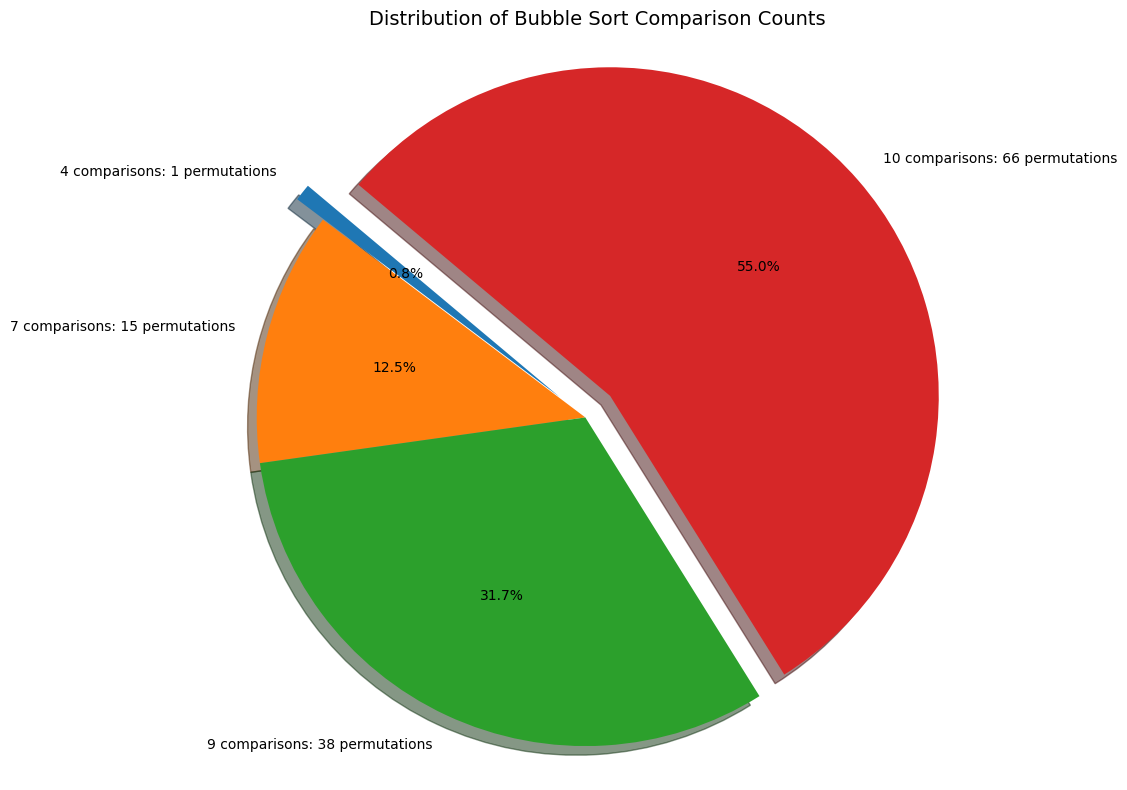

In [28]:

# Create a pie chart showing the distribution of comparison counts
comparison_counts = Counter(comparisons_list)
labels = [f'{count} comparisons: {freq} permutations' for count, freq in comparison_counts.items()]
sizes = list(comparison_counts.values())
explode = [0.1 if count == min_comparisons or count == max_comparisons else 0 for count in comparison_counts.keys()]

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Bubble Sort Comparison Counts', fontsize=14)
plt.tight_layout()
plt.show()

# Testing & Validation

### 🧪 Unit Test Summary

This test suite validates the correctness of all 8 tasks in the Computational Theory project:

- **Task 1:** Bitwise operations (`rotl`, `rotr`, `ch`, `maj`) are tested with known binary values.
- **Task 2:** Verifies K&R hash outputs for sample strings.
- **Task 3:** Confirms SHA-256 padding for a file containing `"abc"`, including correct 64-bit length encoding.
- **Task 4:** Checks prime detection and generation functions.
- **Task 5:** Validates the extraction of fractional root bits (used in SHA-like constants).
- **Task 6:** Tests SHA-256 hash leading zero detection and dictionary word validation.
- **Task 7:** Ensures the Turing machine correctly increments binary numbers.
- **Task 8:** Counts comparisons in bubble sort for best and worst-case permutations.

All tests are run using Python’s `unittest` framework.


In [29]:
class TestComputationalTheoryTasks(unittest.TestCase):

    # 🔹 Task 1: Binary Representations
    def test_rotl(self):
        self.assertEqual(rotl(0x12345678, 4), 0x23456781)

    def test_rotr(self):
        self.assertEqual(rotr(0x12345678, 4), 0x81234567)

    def test_ch(self):
        x = 0b10101010101010101010101010101010
        y = 0b11110000111100001111000011110000
        z = 0b00001111000011110000111100001111
        expected_output = (x & y) ^ (~x & z) & 0xFFFFFFFF  # Expected output calculation
        self.assertEqual(ch(x, y, z), expected_output)

    def test_maj(self):
        x = 0b10101010101010101010101010101010
        y = 0b11110000111100001111000011110000
        z = 0b00001111000011110000111100001111
        expected_output = ((x & y) ^ (x & z) ^ (y & z)) & 0xFFFFFFFF  # Expected output calculation
        self.assertEqual(maj(x, y, z), expected_output)

    def test_rotl_edge_cases(self):
        # Test with 0
        self.assertEqual(rotl(0, 10), 0)
        
        # Test with all 1s
        all_ones = 0xFFFFFFFF
        self.assertEqual(rotl(all_ones, 5), all_ones)
        
        # Test with rotation of 0
        self.assertEqual(rotl(0x12345678, 0), 0x12345678)
        
        # Test with rotation of 32 (should be the same as input)
        self.assertEqual(rotl(0x12345678, 32), 0x12345678)
    
    def test_rotr_edge_cases(self):
        # Test with 0
        self.assertEqual(rotr(0, 10), 0)
        
        # Test with all 1s
        all_ones = 0xFFFFFFFF
        self.assertEqual(rotr(all_ones, 5), all_ones)
        
        # Test with rotation of 0
        self.assertEqual(rotr(0x12345678, 0), 0x12345678)
        
        # Test with rotation of 32 (should be the same as input)
        self.assertEqual(rotr(0x12345678, 32), 0x12345678)

    # 🔹 Task 2: Hash Functions
    def test_kr_hash(self):
        self.assertEqual(kr_hash("hello"), 17)
        self.assertEqual(kr_hash("world"), 34)

    # 🔹 Task 3: SHA256 Padding
    def test_sha256_padding(self):
        # Create a test file
        test_filename = "test_padding.txt"
        with open(test_filename, "wb") as f:
            f.write(b"abc")  # Simple input string

        # Compute the padding
        padding = sha256_padding(test_filename)

        # Expected length field (last 64 bits) in big-endian format
        message_length = 3 * 8  # "abc" = 3 bytes → 24 bits
        expected_length_field = f"{message_length:016x}"  # Convert to 64-bit hex (big-endian)

        # Compare only the last 16 hex chars (64 bits)
        self.assertTrue(padding[-16:] == expected_length_field, 
                    f"Expected last 64 bits: {expected_length_field}, got: {padding[-16:]}")
    
    def test_sha256_padding_edge_cases(self):
        # Test with empty file
        empty_filename = "empty_test.txt"
        with open(empty_filename, "wb") as f:
            f.write(b"")
        
        padding = sha256_padding(empty_filename)
        # For an empty file (0 bytes), the padding should include:
        # 1. A single '1' bit followed by zeros (0x80 followed by zeros)
        # 2. The length (0) as a 64-bit big-endian integer
        self.assertTrue(padding.startswith("80"), "Padding should start with 0x80 (single 1 bit)")
        self.assertEqual(padding[-16:], "0000000000000000", "Length field should be 0")
        
        # Test with a 55-byte file (edge case: exactly fits in one block with padding)
        edge_filename = "edge_test.txt"
        with open(edge_filename, "wb") as f:
            f.write(b"a" * 55)
        
        padding = sha256_padding(edge_filename)
        # Expected length is 55 * 8 = 440 bits
        expected_length = "00000000000001b8"  # 440 in hex
        self.assertEqual(padding[-16:], expected_length)

    # 🔹 Task 4: Prime Numbers
    def test_isprime_sqrt(self):
        self.assertTrue(isprime_sqrt(17))
        self.assertFalse(isprime_sqrt(18))

    def test_first_n_primes(self):
        self.assertEqual(first_n_primes(5), [2, 3, 5, 7, 11])

    def test_miller_rabin_edge_cases(self):
        # Test small known primes
        self.assertTrue(miller_rabin(2))
        self.assertTrue(miller_rabin(3))
        self.assertTrue(miller_rabin(5))
        self.assertTrue(miller_rabin(7))
        
        # Test small known composites
        self.assertFalse(miller_rabin(4))
        self.assertFalse(miller_rabin(6))
        self.assertFalse(miller_rabin(8))
        self.assertFalse(miller_rabin(9))
        
        # Test larger known prime
        self.assertTrue(miller_rabin(104729))  # 10,000th prime

    # 🔹 Task 5: Roots
    def test_fractional_root_bits(self):
        self.assertEqual(fractional_root_bits(2), int((math.sqrt(2) - int(math.sqrt(2))) * (2**32)))

    # 🔹 Task 6: Proof of Work
    def test_sha256_leading_zeros(self):
        self.assertGreaterEqual(sha256_leading_zeros("hello"), 0)
        self.assertGreaterEqual(sha256_leading_zeros("guilefulness"), 0)
        
        # Test with an empty string (should return a valid count)
        self.assertGreaterEqual(sha256_leading_zeros(""), 0)

    def test_sha256_leading_zeros_specific(self):
        # Test with empty string (known result)
        # Empty string hash: e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855
        # This starts with "e3" which is "11100011" in binary, so 0 leading zeros
        self.assertEqual(sha256_leading_zeros(""), 0)
        
        # Test with a string that has a known number of leading zeros
        # If you found "guilefulness" has 16 leading zeros:
        self.assertEqual(sha256_leading_zeros("guilefulness"), 16)
        
        # Verify calculation with a simple example (manually calculated)
        # "a" hash: ca978112ca1bbdcafac231b39a23dc4da786eff8147c4e72b9807785afee48bb
        # This starts with "ca" which is "11001010" in binary, so 0 leading zeros
        self.assertEqual(sha256_leading_zeros("a"), 0)

    def test_is_valid_word(self):
        # Test valid word (assuming it's in dictionary.txt)
        self.assertTrue(is_valid_word("hello"))

        # Test invalid word
        self.assertFalse(is_valid_word("notarealword"))

        # Test a word that might be in your built-in fallback list
        self.assertTrue(is_valid_word("guilefulness"))

    # 🔹 Task 7: Turing Machine
    def test_turing_machine_add_one(self):
        self.assertEqual(turing_machine_add_one(list("100111")), "101000")
        self.assertEqual(turing_machine_add_one(list("111")), "1000")

    def test_turing_machine_edge_cases(self):
        # Edge Case 1: Empty tape → treat as incrementing nothing = '1'
        self.assertEqual(turing_machine_add_one([]), "1")

        # Edge Case 2: Single bit '0' → becomes '1'
        self.assertEqual(turing_machine_add_one(list("0")), "1")

        # Edge Case 3: Single bit '1' → becomes '10' (requires carry)
        self.assertEqual(turing_machine_add_one(list("1")), "10")

        # Edge Case 4: All ones (e.g., '11111') → becomes '100000' (carry propagates through)
        self.assertEqual(turing_machine_add_one(list("11111")), "100000")

        # Edge Case 5: Leading zeros ('0011') → result is '0100', leading zeros preserved
        self.assertEqual(turing_machine_add_one(list("0011")), "0100")

        # Edge Case 6: Leading zeros with carry across boundary → '00001' → '00010'
        self.assertEqual(turing_machine_add_one(list("00001")), "00010")

    # 🔹 Task 8: Computational Complexity
    def test_bubble_sort_count_comparisons(self):
        _, comparisons_best = bubble_sort_count_comparisons([1, 2, 3, 4, 5])
        _, comparisons_worst = bubble_sort_count_comparisons([5, 4, 3, 2, 1])
        self.assertEqual(comparisons_best, 4)
        self.assertEqual(comparisons_worst, 10)

# Run all tests
if __name__ == "__main__":
    unittest.main(argv=[''], verbosity=2, exit=False)

test_bubble_sort_count_comparisons (__main__.TestComputationalTheoryTasks.test_bubble_sort_count_comparisons) ... ok
test_ch (__main__.TestComputationalTheoryTasks.test_ch) ... ok
test_first_n_primes (__main__.TestComputationalTheoryTasks.test_first_n_primes) ... ok
test_fractional_root_bits (__main__.TestComputationalTheoryTasks.test_fractional_root_bits) ... ok
test_is_valid_word (__main__.TestComputationalTheoryTasks.test_is_valid_word) ... ok
test_isprime_sqrt (__main__.TestComputationalTheoryTasks.test_isprime_sqrt) ... ok
test_kr_hash (__main__.TestComputationalTheoryTasks.test_kr_hash) ... ok
test_maj (__main__.TestComputationalTheoryTasks.test_maj) ... ok
test_miller_rabin_edge_cases (__main__.TestComputationalTheoryTasks.test_miller_rabin_edge_cases) ... ok
test_rotl (__main__.TestComputationalTheoryTasks.test_rotl) ... ok
test_rotl_edge_cases (__main__.TestComputationalTheoryTasks.test_rotl_edge_cases) ... ok
test_rotr (__main__.TestComputationalTheoryTasks.test_rotr) ... ok
